# Simultaneous Resistance/Reactance/Impedance
## Example H2 from the GUM

This example demonstrates three simultaneous functions and loading raw measurement data from a CSV file. All the input parameters, including mean, standard uncertainty, degrees of freedom, and correlations are determined from the data points in IVdata.csv file.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import suncal
import numpy as np

In [2]:
# Load the raw data from a file. This data is from Table H.2 in GUM.
V, J, th = np.genfromtxt('IVdata.csv', delimiter=',', skip_header=1).T

In [3]:
# Three functions to calculate
R = 'V/J * cos(theta)'
X = 'V/J * sin(theta)'
Z = 'V/J'
u = suncal.UncertCalc([R, X, Z], units=['ohm', 'ohm', 'ohm'])

k = np.sqrt(len(V))
# Note that numpy's std() function normalizes by N, not N-1! Use ddof=1.
u.set_input('V', nom=V.mean(), std=V.std(ddof=1)/k, units='volt')
u.set_input('J', nom=J.mean(), std=J.std(ddof=1)/k, units='mA')
u.set_input('theta', nom=th.mean(), std=th.std(ddof=1)/k, units='rad')

# Use numpy to determine correlation coefficients, set matrix directly.
u.set_correlation(np.corrcoef(np.vstack((V, J, th))))

In [4]:
out = u.calculate()
out.report(n=3)




Method            |Mean        |Standard Uncertainty 
------------------|------------|---------------------
GUM Approximation |127.7322  Ω |0.0711  Ω            
Monte Carlo       |127.7320  Ω |0.0712  Ω            




Method            |Mean       |Standard Uncertainty 
------------------|-----------|---------------------
GUM Approximation |219.847  Ω |0.296  Ω             
Monte Carlo       |219.846  Ω |0.296  Ω             




Method            |Mean       |Standard Uncertainty 
------------------|-----------|---------------------
GUM Approximation |254.260  Ω |0.236  Ω             
Monte Carlo       |254.260  Ω |0.237  Ω             



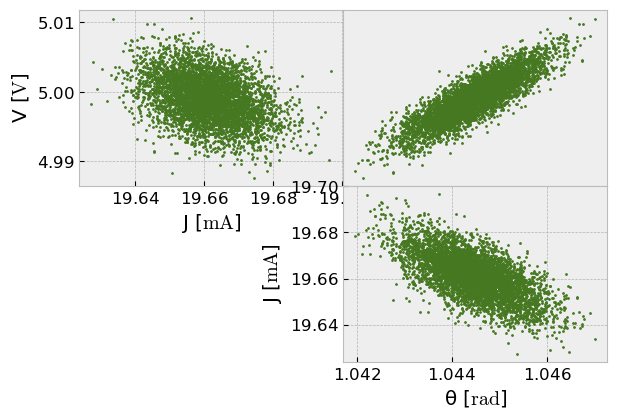

In [5]:
# Scatter plot will show the correlations between variables. Reducing number of points in scatter plot to speed up drawing.
u.out.plot_xscatter(points=5000);

In [6]:
u.out.report_expanded()



### GUM Approximation


Interval |Min        |Max        |k     |Deg. Freedom |Expanded Uncertainty 
---------|-----------|-----------|------|-------------|---------------------
99.00%   |127.55  Ω  |127.92  Ω  |2.576 |inf          |0.18  Ω              
95.00%   |127.59  Ω  |127.87  Ω  |1.960 |inf          |0.14  Ω              
90.00%   |127.62  Ω  |127.85  Ω  |1.645 |inf          |0.12  Ω              
68.00%   |127.661  Ω |127.803  Ω |0.994 |inf          |0.071  Ω             

### Monte Carlo

Symmetric Coverage Intervals

Interval |Min        |Max        |k     
---------|-----------|-----------|------
99.00%   |127.548  Ω |127.915  Ω |2.579 
95.00%   |127.592  Ω |127.871  Ω |1.958 
90.00%   |127.615  Ω |127.849  Ω |1.644 
68.00%   |127.661  Ω |127.803  Ω |0.995 



### GUM Approximation


Interval |Min       |Max       |k     |Deg. Freedom |Expanded Uncertainty 
---------|----------|----------|------|-------------|---------------------
99.00%   |219.09  Ω |220.61  Ω |2.576 |inf          |0.76  Ω              
95.00%   |219.27  Ω |220.43  Ω |1.960 |inf          |0.58  Ω              
90.00%   |219.36  Ω |220.33  Ω |1.645 |inf          |0.49  Ω              
68.00%   |219.55  Ω |220.14  Ω |0.994 |inf          |0.29  Ω              

### Monte Carlo

Symmetric Coverage Intervals

Interval |Min       |Max       |k     
---------|----------|----------|------
99.00%   |219.08  Ω |220.61  Ω |2.575 
95.00%   |219.27  Ω |220.43  Ω |1.963 
90.00%   |219.36  Ω |220.33  Ω |1.646 
68.00%   |219.55  Ω |220.14  Ω |0.994 



### GUM Approximation


Interval |Min       |Max       |k     |Deg. Freedom |Expanded Uncertainty 
---------|----------|----------|------|-------------|---------------------
99.00%   |253.65  Ω |254.87  Ω |2.576 |inf          |0.61  Ω              
95.00%   |253.80  Ω |254.72  Ω |1.960 |inf          |0.46  Ω              
90.00%   |253.87  Ω |254.65  Ω |1.645 |inf          |0.39  Ω              
68.00%   |254.02  Ω |254.49  Ω |0.994 |inf          |0.24  Ω              

### Monte Carlo

Symmetric Coverage Intervals

Interval |Min       |Max       |k     
---------|----------|----------|------
99.00%   |253.65  Ω |254.87  Ω |2.574 
95.00%   |253.80  Ω |254.72  Ω |1.962 
90.00%   |253.87  Ω |254.65  Ω |1.646 
68.00%   |254.03  Ω |254.50  Ω |0.993 



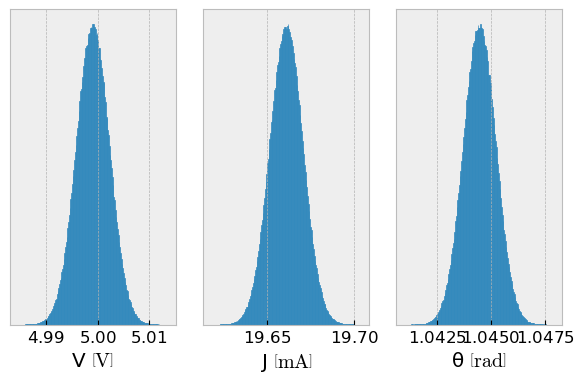

In [7]:
f = plt.figure(figsize=(6,4))
u.out.plot_xhists(fig=f)

In [8]:
u.out.report_derivation()

### Function:



GUM formula for combined uncertainty:



### Input Definitions:


Variable                       |Std. Uncertainty                      
-------------------------------|--------------------------------------
        |        
       |       
 | 

Correlation coefficients:






### Sensitivity Coefficients:







### Simplified combined uncertainty:



### Effective degrees of freedom:



---

### Function:



GUM formula for combined uncertainty:



### Input Definitions:


Variable                       |Std. Uncertainty                      
-------------------------------|--------------------------------------
        |        
       |       
 | 

Correlation coefficients:






### Sensitivity Coefficients:







### Simplified combined uncertainty:



### Effective degrees of freedom:



---

### Function:



GUM formula for combined uncertainty:



### Input Definitions:


Variable                 |Std. Uncertainty                
-------------------------|--------------------------------
  |  
 | 

Correlation coefficients:


### Sensitivity Coefficients:





### Simplified combined uncertainty:



### Effective degrees of freedom:



---

